# Shiftr: Simple, Clean Image Shifting Fun

First, run the cell below. You can do that using shift+Enter, or Cell>Run

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.ndimage.interpolation import shift, rotate
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display
import png
import csv

def plot_shift(im0, im, shift_y,shift_x, lim):
    s=shift(im, [shift_y,shift_x])
    diff=s-im0
    fig, ax=plt.subplots(figsize=(16,16))
    ax.imshow(diff, cmap=plt.cm.bwr, clim=[-lim,lim])
    
number=["0"+str(i) if i<10 else str(i) for i in range(1,13)]

ModuleNotFoundError: No module named 'png'

### Loading the data
Then run this cell to navigate to the correct directory on LINNA, or change it to point to a local directory on your computer. You should use the folder which contains two folders, Background and Shot. 

Run the cell below to load the data. Shots and backgrounds should be in separate folders called eg. "s0821_15 Background" and "s0821_15 Shot" and the files should be labeled eg "s0821_15 Shot_001". If you get a FileNotFoundError, look at what filename the code was searching for. If you're using a different file name covnention, you'll need to edit the bk_fn and sh_fn strings below to reflect that, or edit all your filenames to the standard convention.

In [4]:
%cd "C:\Users\jdhare\Google Drive\MAGPIE\data\2018\s0814_18 C reconnection weak drive TS\s0814_18 12 frame"
shot=os.path.split(os.getcwd())[-1][0:8] #automatically grab the shot number
b=[]
s=[]
for n in number:
        
    bk_fn="background/"+shot+" 12 frame _0"+n+".tif"
    bk_im=plt.imread(bk_fn) #read background image
    bk_im=np.asarray(bk_im,dtype=float)
    b.append(bk_im)
    
    sh_fn="shot/"+shot+" 12 frame_0"+n+".tif" 
    sh_im=plt.imread(sh_fn)
    sh_im=np.asarray(sh_im,dtype=float)
    s.append(sh_im)

shifts=np.zeros((12,2))



C:\Users\jdhare\Google Drive\MAGPIE\data\2018\s0814_18 C reconnection weak drive TS\s0814_18 12 frame


#### Rotate the images and create empty arrays to hold results
It can be easier to align if you rotate your image so that a straight edge lies along either x or y. Even if you don't want to rotate the images, you need to run the cell below (with angle=0!)

In [5]:
angle=-3.5 #degrees to rotate counter-clockwise
b=[rotate(b_im, angle)for b_im in b]
s=[rotate(s_im, angle)for s_im in s]
bb=np.zeros((12, b[0].shape[0], b[0].shape[1])) #create an empty array to store the results
ss=np.zeros((12, s[0].shape[0], s[0].shape[1]))
bb[0]=b[0]
ss[0]=s[0]

#### Shifting the images
Change 'image' to be the desired image. Images are labelled from 1. You don't need to adjust image 1! 
Then run this cell. Use the sliders to achieve the best overlap. If you already have a list of shifts from a previous attempt, you can skip the next two steps and load it below.

In [28]:
image=12
sy=widgets.FloatSlider(min=-50,max=50,step=0.5,value=shifts[image-1,0])
sx=widgets.FloatSlider(min=-50,max=50,step=0.5,value=shifts[image-1,1])
li=widgets.FloatSlider(min=0,max=2000,step=10,value=1000)
w=interactive(plot_shift, im0=fixed(b[0]), im=fixed(b[image-1]), shift_y=sy, shift_x=sx, lim=li)
display(w)

A Jupyter Widget

#### Save the shifts for this image
Once you are happy with the overlap, run the cell below to shift the shot image. Then change 'image' to the next image along in the cell above, run it, and repeat this step until all images have been shifted.

In [29]:
tx, ty=w.kwargs['shift_x'], w.kwargs['shift_y']
shifts[image-1]=(ty,tx)
bb[image-1]=sp.ndimage.shift(b[image-1], [ty,tx])
ss[image-1]=sp.ndimage.shift(s[image-1], [ty,tx])

#### Loading a previous list of shifts
If you want to a list of shifts from a previous shot, first use the cell below to navigate to the correct directory, and then enter the file name at the top of the next cell. You can then optimise these shifts using the cell above if you want.

In [8]:
%cd "C:\Users\jdhare\Google Drive\MAGPIE\data\2017\s0920_17 C Reconnection Faraday\s0920_17 12 frame"
filename='s0920_17 shifts'
image,ty,tx=np.genfromtxt(filename+'.txt', delimiter=',', unpack=True, skip_header=1)
image=image.astype(int)

for i in image:
    bb[i-1]=sp.ndimage.shift(b[i-1], [ty,tx])
    ss[i-1]=sp.ndimage.shift(s[i-1], [ty,tx])

C:\Users\jdhare\Google Drive\MAGPIE\data\2017\s0920_17 C Reconnection Faraday\s0920_17 12 frame


### Saving the results
Change to the directory you want to put the files to.

In [59]:
cd "C:\Users\jdhare\Google Drive\MAGPIE\data\2018\s0327_18 carbon imploder with faraday\s0327_18 12 frame

C:\Users\jdhare\Google Drive\MAGPIE\data\2018\s0327_18 carbon imploder with faraday\s0327_18 12 frame


Finally, run one of the cells below to save out all of the shifted background and shot images.
#### Standard version - use this one
This version saves out the shifted images with no changes to the overall brightness.

In [30]:
for i,n in enumerate(number):
    bkfn=shot+" Background_0"+n+".png"
    f = open(bkfn, 'wb')
    b_im=np.clip(bb[i], a_min=0, a_max=2**16-1)
    pwriter = png.Writer(len(b_im[0]), len(b_im), greyscale=True, bitdepth=16)
    pwriter.write(f,b_im)
    f.close()
    shfn=shot+" Shot_0"+n+".png"
    f = open(shfn, 'wb')
    s_im=np.clip(ss[i], a_min=0, a_max=2**16-1)
    pwriter = png.Writer(len(s_im[0]), len(s_im), greyscale=True, bitdepth=16)
    pwriter.write(f,s_im)
    f.close()
    
with open(shot+" shifts.txt", 'w', newline='') as file:
    cwriter = csv.writer(file, delimiter=',')
    cwriter.writerow(['Image', 'Y Shift', 'X Shift'])
    for f in zip(range(1,13), shifts[:,0], shifts[:,1]):
        cwriter.writerow(f)

#### Version which attempts to normalises to the background image brightness
This version finds how bright the background image was, and normalises the brightness of the shot image to that. First run the cell below to produce a histogram of pixel brightnesses. You might need to adjust the upper and lower limits so there is just one maximum in every frame.

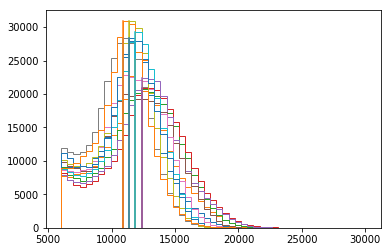

In [31]:
lower_limit=6e3
upper_limit=3e4

peak_counts=np.zeros((12))
fig,ax=plt.subplots()
for i in range(0,12):
    c,b,a=ax.hist(bb[i].flatten(), bins=np.linspace(lower_limit,upper_limit,50), histtype='step')
    p=b[c.argmax()]
    ax.plot([p,p],[0,c.max()],c=a[0].get_edgecolor())
    peak_counts[i]=p
    
normalised_intensity=peak_counts/peak_counts.max()

Then run the cell below to save out the normalised, shifted images.

In [32]:
ss_n=[]
bb_n=[]

for i,n in enumerate(number):
    bkfn=shot+" Background_0"+n+".png"
    f = open(bkfn, 'wb')
    bb_n.append(bb[i]/normalised_intensity[i])
    b_im=np.clip(bb[i], a_min=0, a_max=2**16-1)
    pwriter = png.Writer(len(b_im[0]), len(b_im), greyscale=True, bitdepth=16)
    pwriter.write(f,b_im)
    f.close()
    
    shfn=shot+" Shot_0"+n+".png"
    f = open(shfn, 'wb')
    ss_n.append(ss[i]/normalised_intensity[i])
    s_im=np.clip(ss_n[i], a_min=0, a_max=2**16-1)
    pwriter = png.Writer(len(s_im[0]), len(s_im), greyscale=True, bitdepth=16)
    pwriter.write(f,s_im)
    f.close()
    
with open(shot+" shifts.txt", 'w', newline='') as file:
    cwriter = csv.writer(file, delimiter=',')
    cwriter.writerow(['Image', 'Y Shift', 'X Shift'])
    for f in zip(range(1,13), shifts[:,0], shifts[:,1]):
        cwriter.writerow(f)

#### Version which removes the brightest pixels
This version makes a cumulative histogram of pixel brightness, and removes the top 1% to avoid noisy pixels from cosmic rays etc. Not often necessary.

In [52]:
bb_n=[]
ss_n=[]
for i in range(0,12):
    cum_px=np.sort(ss[i].flatten())
    p99=cum_px[int(-cum_px.size/100)]
    sn=ss[i]*2**16/p99
    sn=np.clip(sn, a_min=0, a_max=2**16-1)
    ss_n.append(np.nan_to_num(sn))
    cum_px=np.sort(bb[i].flatten())
    p99=cum_px[int(-cum_px.size/100)]
    bn=bb[i]*2**16/p99
    bn=np.clip(bn, a_min=0, a_max=2**16-1)
    bb_n.append(np.nan_to_num(bn))

for i in range(0,12):
    if i<9:
        st="0"+str(i+1)
    else:
        st=str(i+1)
    bkfn=shot+" Background_0"+st+".png"
    f = open(bkfn, 'wb')
    b_im=bb_n[i]
    pwriter = png.Writer(len(b_im[0]), len(b_im), greyscale=True, bitdepth=16)
    pwriter.write(f,b_im)
    f.close()
    shfn=shot+" Shot_0"+st+".png"
    f = open(shfn, 'wb')
    s_im=ss_n[i]
    pwriter = png.Writer(len(s_im[0]), len(s_im), greyscale=True, bitdepth=16)
    pwriter.write(f,s_im)
    f.close()
    
with open(shot+" shifts.txt", 'w', newline='') as file:
    cwriter = csv.writer(file, delimiter=',')
    cwriter.writerow(['Image', 'Y Shift', 'X Shift'])
    for f in zip(range(1,13), shifts[:,0], shifts[:,1]):
        cwriter.writerow(f)

#### Playing around with rotations
If you want to rotate your shifts into a new coordinate system, use this code.

In [66]:
th=angle*np.pi/180.0
sr=np.array([[np.sin(th)*s[1]+np.cos(th)*s[0],np.cos(th)*s[1]-np.sin(th)*s[0]] for s in shifts])

In [69]:
filename=shot+" shifts in original frame"
data=zip(range(1,13), sr[:,0], sr[:,1])
with open(filename+'.txt', 'w', newline='') as file:
    cwriter = csv.writer(file, delimiter=',')
    cwriter.writerow(['Image', 'Y Shift', 'X Shift'])
    for f in data:
        cwriter.writerow(f)

## Automated

In [33]:
import imreg_dft as ird
constraints={'angle':(0,0),'scale':(1,0),'tx':(0,50),'ty':(0,50)}

t=ird.similarity(b[0], b[2], numiter=3, constraints=constraints)
transform = { your_key: t[your_key] for your_key in ['angle','scale','tvec'] }


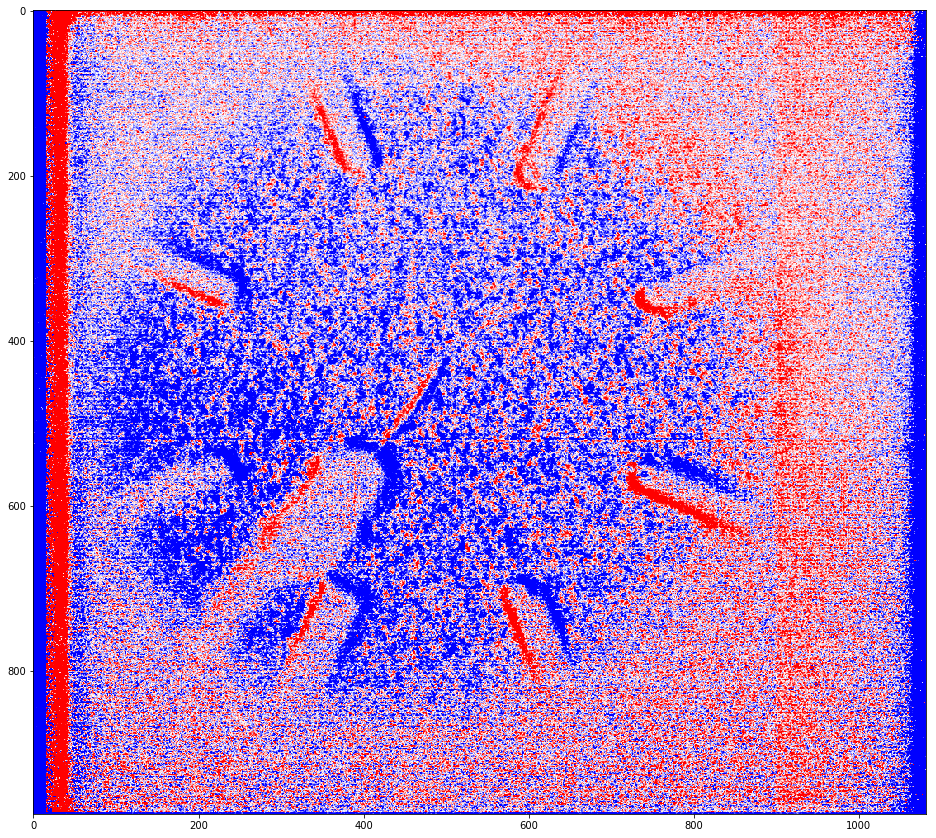

In [37]:
shift_x,shift_y=transform['tvec']
plot_shift(b[0], b[1], shift_y,shift_x, 1000)


In [58]:
shifts

array([[  0.,   0.],
       [  2.,   9.],
       [-34.,  10.],
       [  5.,   9.],
       [-38.,  11.],
       [  9.,  13.],
       [  8.,  -5.],
       [  5.,  28.],
       [-34.,  28.],
       [  2.,  27.],
       [-31.,  25.],
       [  0.,  24.]])